In [ ]:
import pandas as pd
import numpy as np
import keras
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
seed = 42

df = pd.read_csv("big_car_dataset.csv")
out = ["unacc", "acc", "vgood", "good"]
x = df[df.columns.difference(out)]
y = df[out]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, shuffle=True)

FileNotFoundError: [Errno 2] No such file or directory: 'big_car_dataset.csv'

In [ ]:
def train(layers, learning_rate, momentum, epochs):
    global seed
    model = keras.Sequential([
        keras.layers.Dense(size, activation=func, kernel_initializer=keras.initializers.RandomNormal(seed=seed)) for (size, func) in layers
    ])
    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum),
        loss=keras.losses.MeanSquaredError(),
        metrics=[
            keras.metrics.BinaryAccuracy(),
        ]
    )
    history = model.fit(
        x_train,
        y_train,
        epochs=epochs,
        verbose=True,
        validation_data=(x_test, y_test)
    ).history
    return history, model

In [ ]:
def run(layers, learning_rate, momentum, epochs, titles):
    combinations = list(itertools.product(layers, learning_rate, momentum, epochs))
    print(len(combinations))
    return [(*train(*args), args, title) for args, title in zip(combinations, titles)]

In [ ]:
def show(results):
    for (history, model, config, title) in results:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        fig.suptitle(title, fontsize=16)
        ax1.plot(history["loss"], label="Train loss")
        ax1.plot(history["val_loss"], label="Test loss")
        ax1.legend()
        ax2.plot(history["binary_accuracy"], label="Train accuracy")
        ax2.plot(history["val_binary_accuracy"], label="Test accuracy")
        ax2.legend()
        plt.show()
        fig.savefig(title + ".png")

In [ ]:
zadanie1 = run(
    layers=[
        [
            (5, "sigmoid"),
            (4, "sigmoid"),
        ],
        [
            (5, "linear"),
            (4, "linear"),
        ],
        [
            (5, "exponential"),
            (4, "exponential"),
        ],
        [
            (5, "tanh"),
            (4, "tanh"),
        ]
    ],
    learning_rate=[
        0.01,
    ],
    momentum=[
        0.0,
    ],
    epochs=[
        50,
    ],
    titles=[
        "Sigmoid",
        "Linear",
        "Exponential",
        "Tanh"
    ],
)

4
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - binary_accuracy: 0.4040 - loss: 0.2514 - val_binary_accuracy: 0.8429 - val_loss: 0.2464
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.8497 - loss: 0.2445 - val_binary_accuracy: 0.8429 - val_loss: 0.2399
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8593 - loss: 0.2377 - val_binary_accuracy: 0.8429 - val_loss: 0.2337
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.8451 - loss: 0.2321 - val_binary_accuracy: 0.8429 - val_loss: 0.2279
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.8528 - loss: 0.2259 - val_binary_accuracy: 0.8429 - val_loss: 0.2223
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.8544 - loss: 0.2202 - val_binary_accuracy: 0.8429 - val_loss: 0.2171
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.8498 - loss: 0.2155 - val_binary_accuracy: 0.8429 - val_loss: 0.2122
Epoch 8/50
36/36 

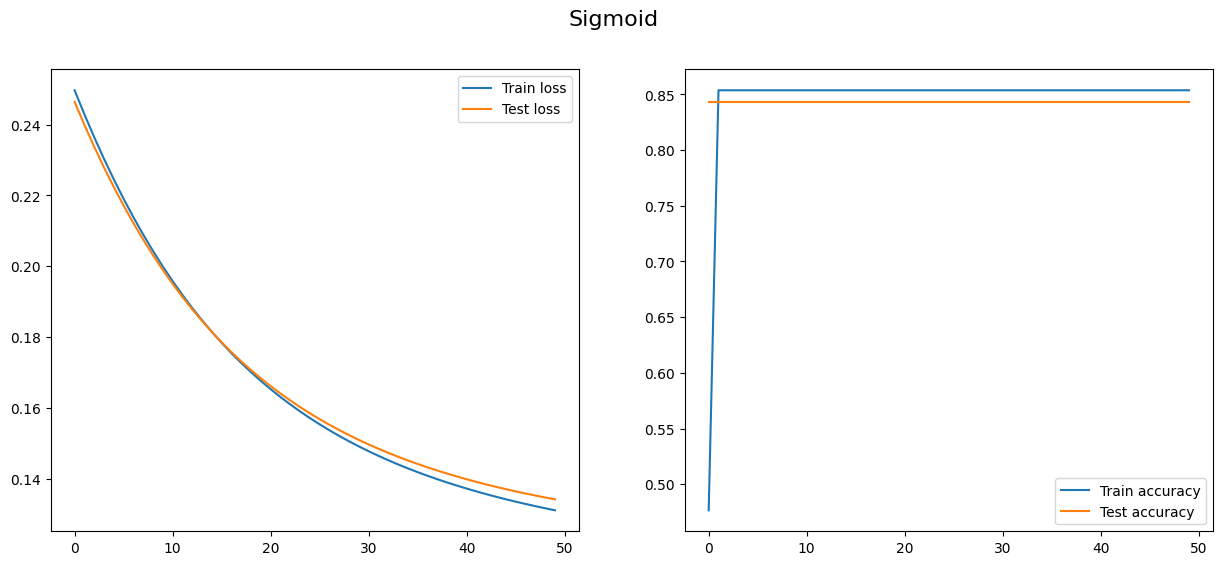

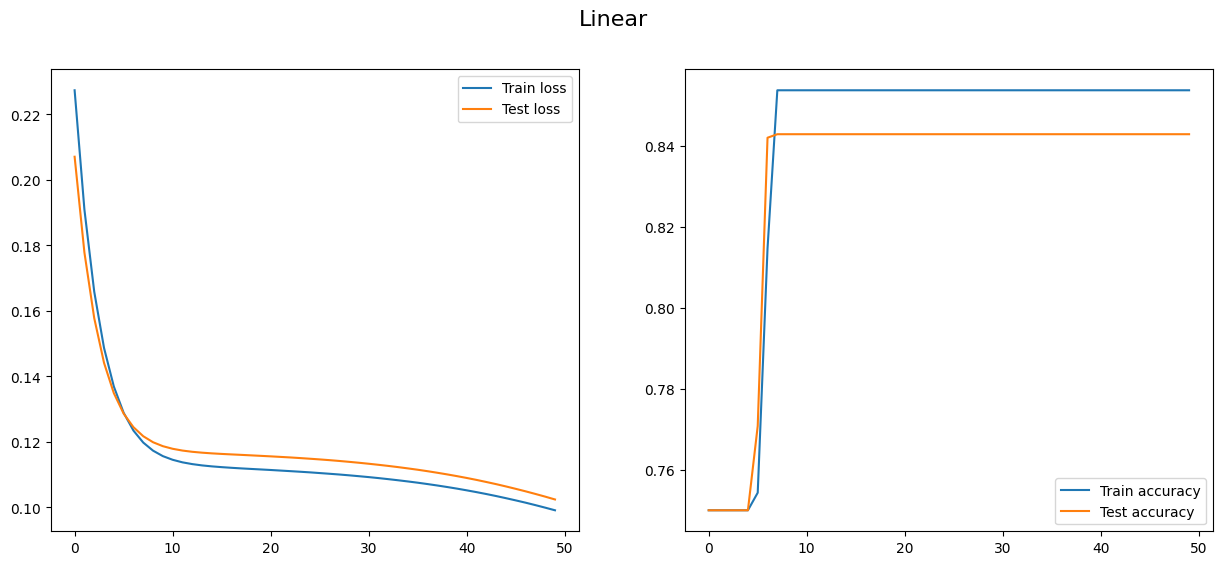

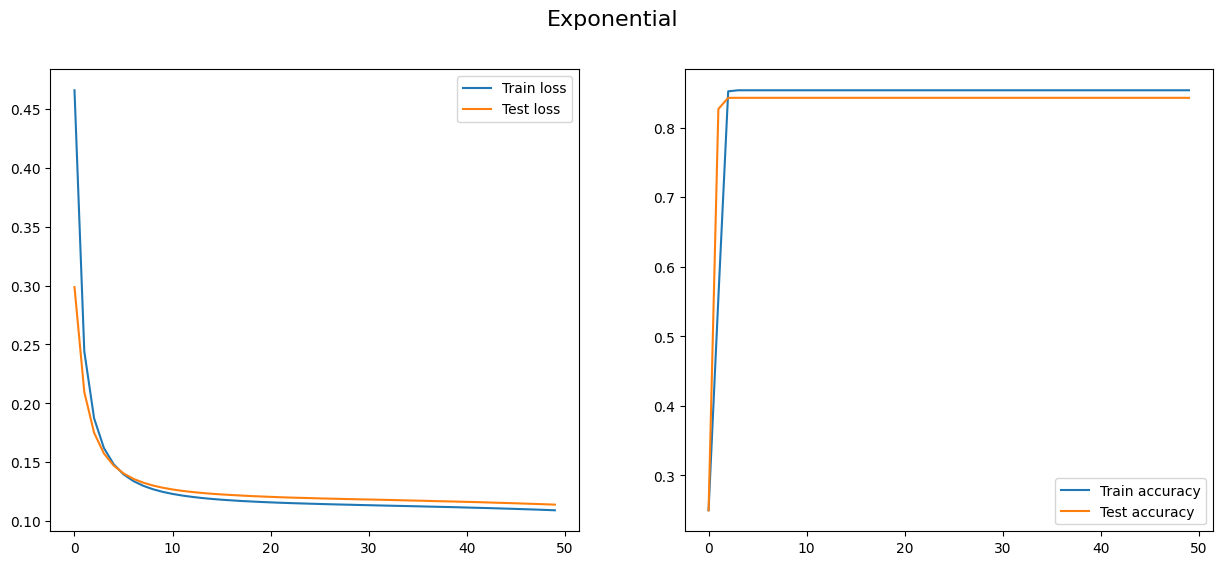

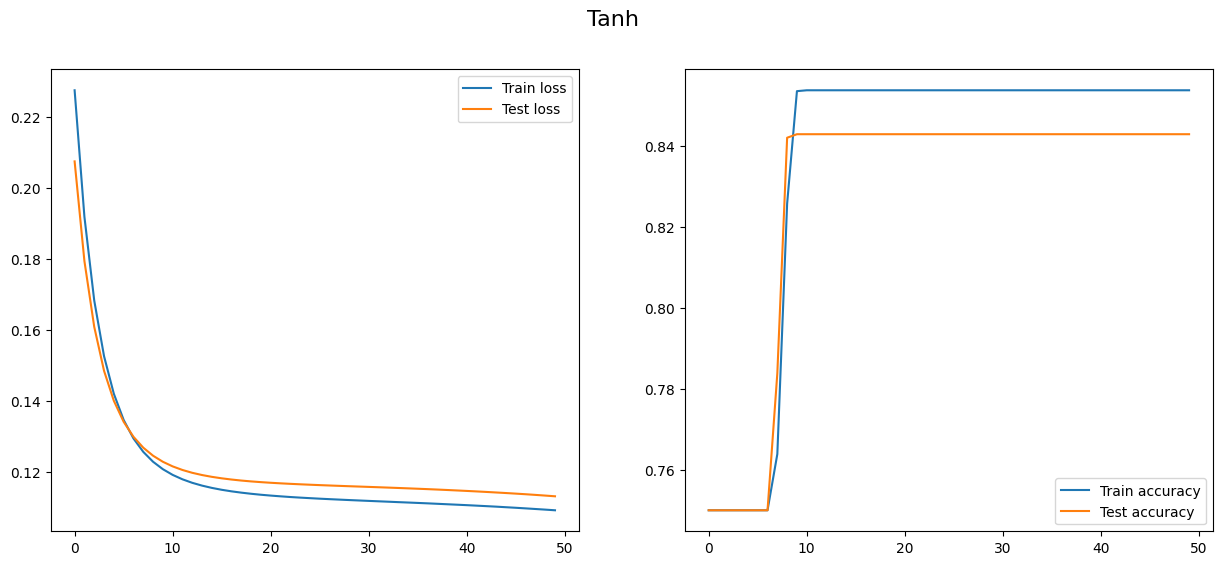

In [ ]:
show(zadanie1)

In [ ]:
zadanie2 = run(
    layers=[
        [
            (3, "sigmoid"),
            (4, "sigmoid"),
        ]
    ],
    learning_rate=[
        0.01,
    ],
    momentum=[
        0.0,
    ],
    epochs=[
        100,
    ],
    titles=[
        "Tylko 3 neurony"
    ]
)

1
Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - binary_accuracy: 0.3042 - loss: 0.2514 - val_binary_accuracy: 0.7500 - val_loss: 0.2476
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.7691 - loss: 0.2462 - val_binary_accuracy: 0.8490 - val_loss: 0.2424
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.8515 - loss: 0.2411 - val_binary_accuracy: 0.8490 - val_loss: 0.2375
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.8574 - loss: 0.2361 - val_binary_accuracy: 0.8490 - val_loss: 0.2328
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.8564 - loss: 0.2314 - val_binary_accuracy: 0.8490 - val_loss: 0.2283
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8477 - loss: 0.2273 - val_binary_accuracy: 0.8490 - val_loss: 0.2239
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8395 - loss: 0.2235 - val_binary_accuracy: 0.8490 - val_loss: 0.2197
Epoch 8/10

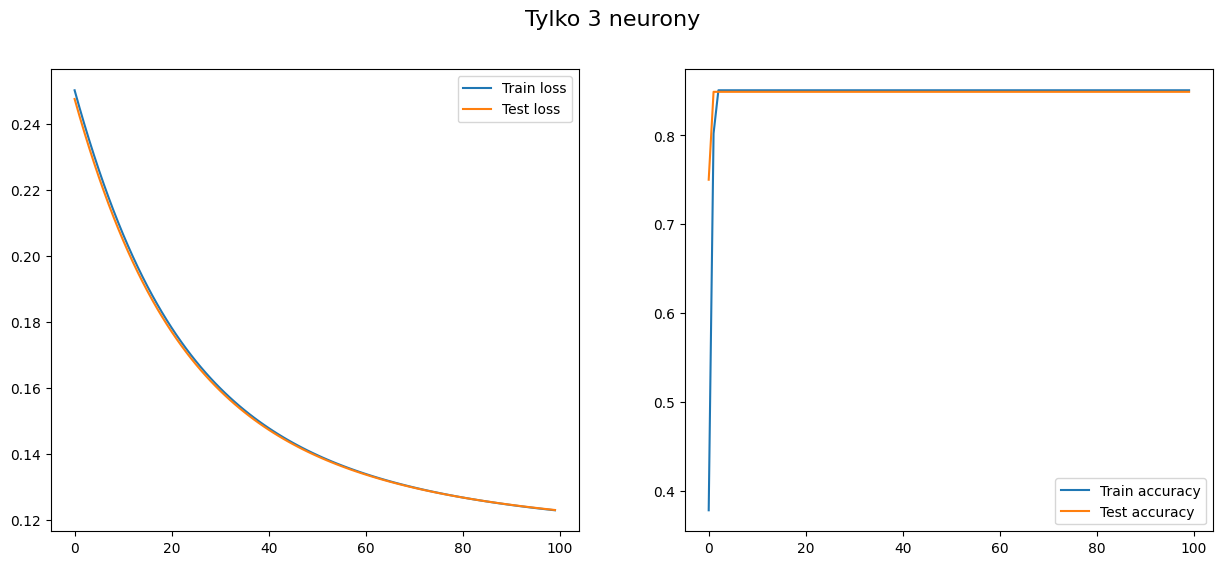

In [ ]:
show(zadanie2)

In [ ]:
zadanie3 = run(
    layers=[
        [
            (5, "sigmoid"),
            (5, "sigmoid"),
            (4, "sigmoid"),
        ]
    ],
    learning_rate=[
        0.01,
    ],
    momentum=[
        0.1,
    ],
    epochs=[
        100,
    ],
    titles=[
        "Dowolne warstwy"
    ]
)

1
Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - binary_accuracy: 0.4139 - loss: 0.2512 - val_binary_accuracy: 0.8490 - val_loss: 0.2455
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - binary_accuracy: 0.8520 - loss: 0.2436 - val_binary_accuracy: 0.8490 - val_loss: 0.2383
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.8384 - loss: 0.2370 - val_binary_accuracy: 0.8490 - val_loss: 0.2315
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.8566 - loss: 0.2295 - val_binary_accuracy: 0.8490 - val_loss: 0.2251
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.8637 - loss: 0.2225 - val_binary_accuracy: 0.8490 - val_loss: 0.2190
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.8468 - loss: 0.2178 - val_binary_accuracy: 0.8490 - val_loss: 0.2134
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.8583 - loss: 0.2112 - val_binary_accuracy: 0.8490 - val_loss: 0.2081
Epoch 8/10

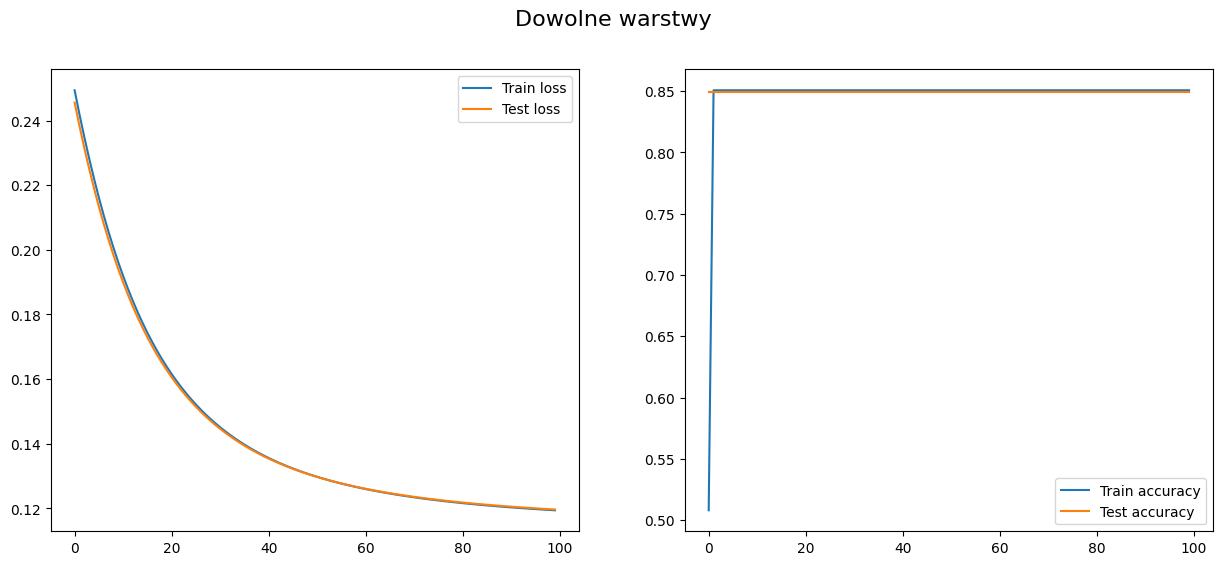

In [ ]:
show(zadanie3)

In [ ]:
seed = 42

df = pd.read_csv("schizophrenia_dataset_english.csv")
df = df.drop("Patient_ID", axis=1)
out = ["Diagnosis"]
x = df[df.columns.difference(out)]
x = (x - x.mean()) / x.std()
y = df[out]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, shuffle=True)

In [ ]:
zadanie4 = run(
    layers=[
        [
            (128, "relu"),
            (64, "relu"),
            (32, "relu"),
            (1, "relu"),
        ],
        [
            (64, "relu"),
            (32, "relu"),
            (16, "relu"),
            (1, "relu"),
        ],
        [
            (32, "relu"),
            (16, "relu"),
            (8, "relu"),
            (1, "relu"),
        ],
        [
            (64, "sigmoid"),
            (32, "sigmoid"),
            (16, "sigmoid"),
            (1, "sigmoid"),
        ],
        [
            (64, "tanh"),
            (32, "tanh"),
            (16, "tanh"),
            (1, "tanh"),
        ]
    ],
    learning_rate=[
        0.001,
        0.01
    ],
    momentum=[
        0.01,
        0.1
    ],
    epochs=[
        50,
    ],
    titles=[
        "Relu 128 .001 .01",
        "Relu 128 .001 .1",
        "Relu 128 .01 .01",
        "Relu 128 .01 .1",

        "Relu 64 .001 .01",
        "Relu 64 .001 .1",
        "Relu 64 .01 .01",
        "Relu 64 .01 .1",

        "Relu 32 .001 .01",
        "Relu 32 .001 .1",
        "Relu 32 .01 .01",
        "Relu 32 .01 .1",

        "Sigmoid 64 .001 .01",
        "Sigmoid 64 .001 .1",
        "Sigmoid 64 .01 .01",
        "Sigmoid 64 .01 .1",

        "Tanh 64 .001 .01",
        "Tanh 64 .001 .1",
        "Tanh 64 .01 .01",
        "Tanh 64 .01 .1",
    ]
)

20
Epoch 1/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - binary_accuracy: 0.7092 - loss: 0.2715 - val_binary_accuracy: 0.7118 - val_loss: 0.2355
Epoch 2/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.7071 - loss: 0.2328 - val_binary_accuracy: 0.7118 - val_loss: 0.2150
Epoch 3/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.7101 - loss: 0.2136 - val_binary_accuracy: 0.7118 - val_loss: 0.2061
Epoch 4/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.7072 - loss: 0.2075 - val_binary_accuracy: 0.7118 - val_loss: 0.2018
Epoch 5/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.7100 - loss: 0.2020 - val_binary_accuracy: 0.7118 - val_loss: 0.1992
Epoch 6/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.7168 - loss: 0.1965 - val_binary_accuracy: 0.7118 - val_loss: 0.1972
Epoch 7/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.6950 - loss: 0.2040 - val_binary_accuracy: 0.7118 - val_loss: 0.1953
Epo

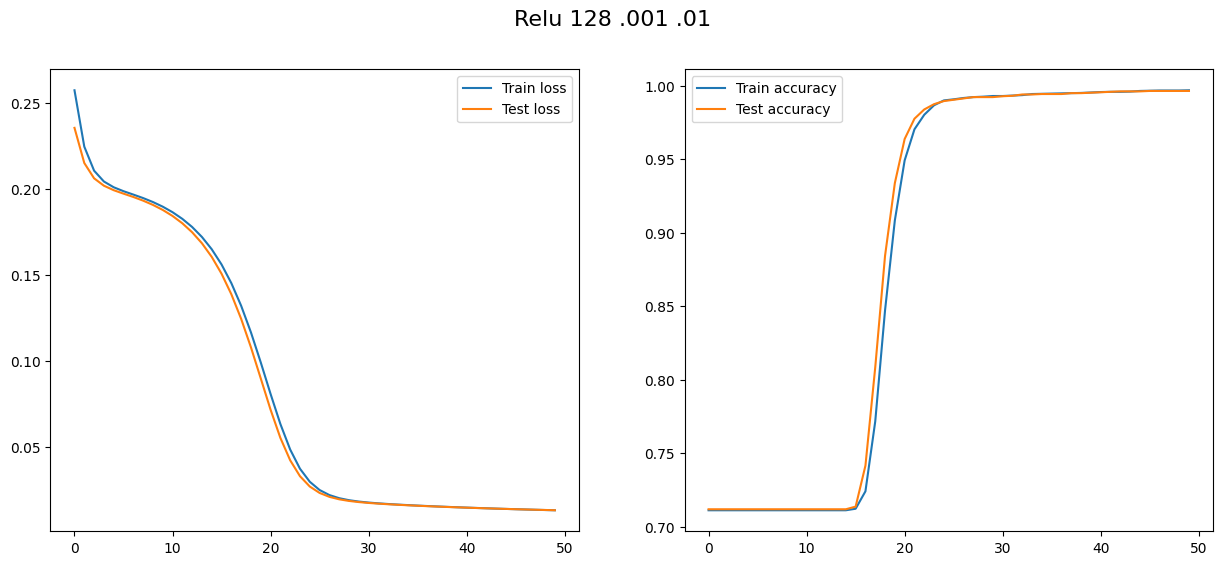

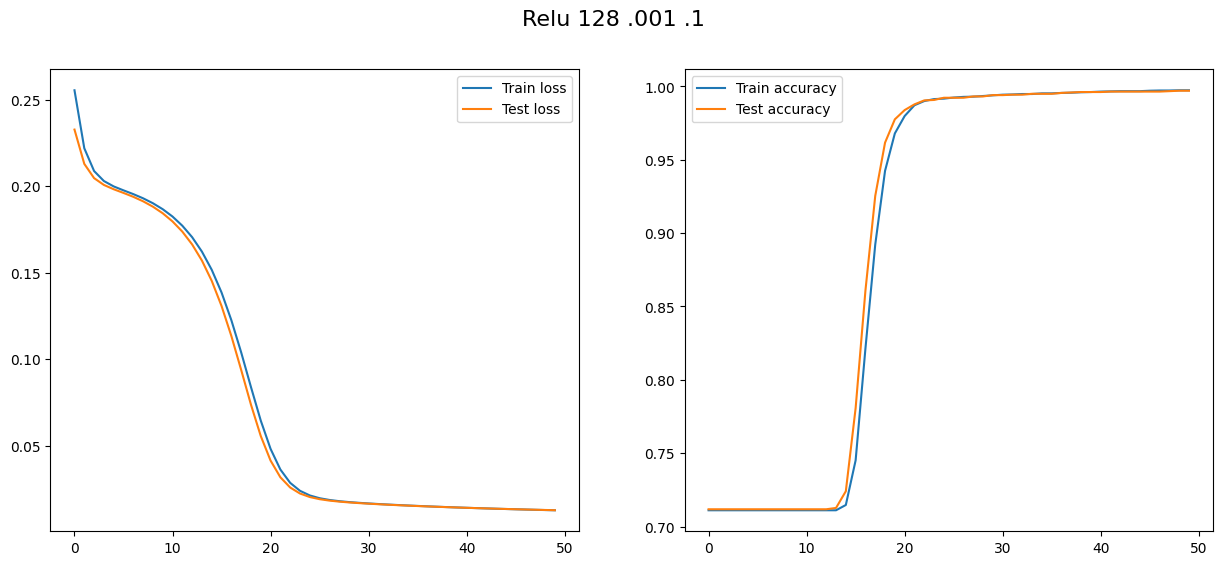

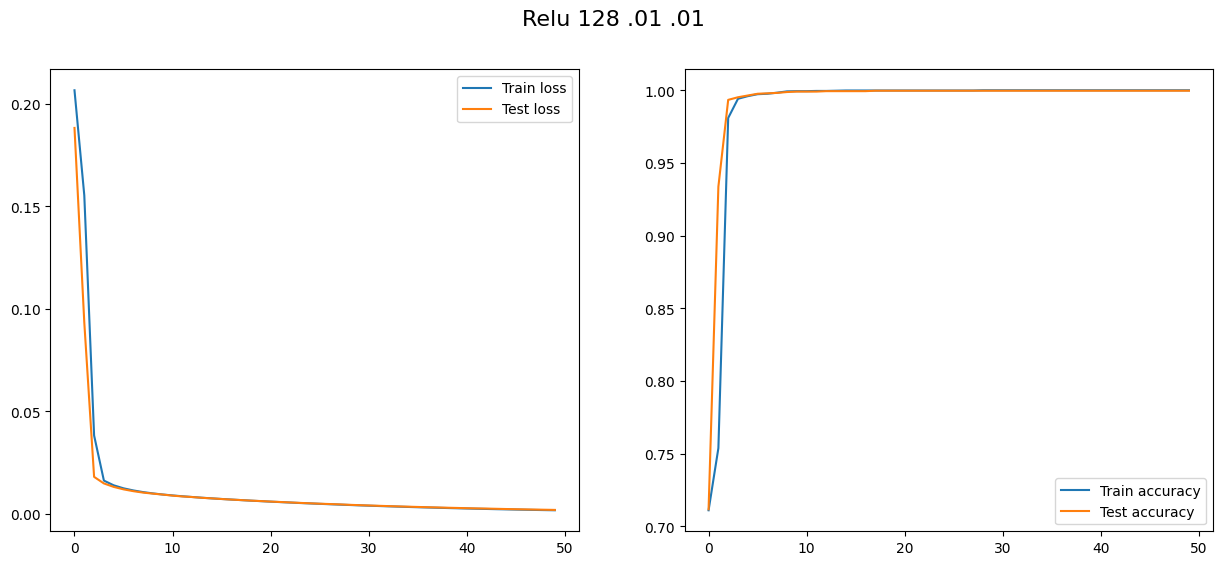

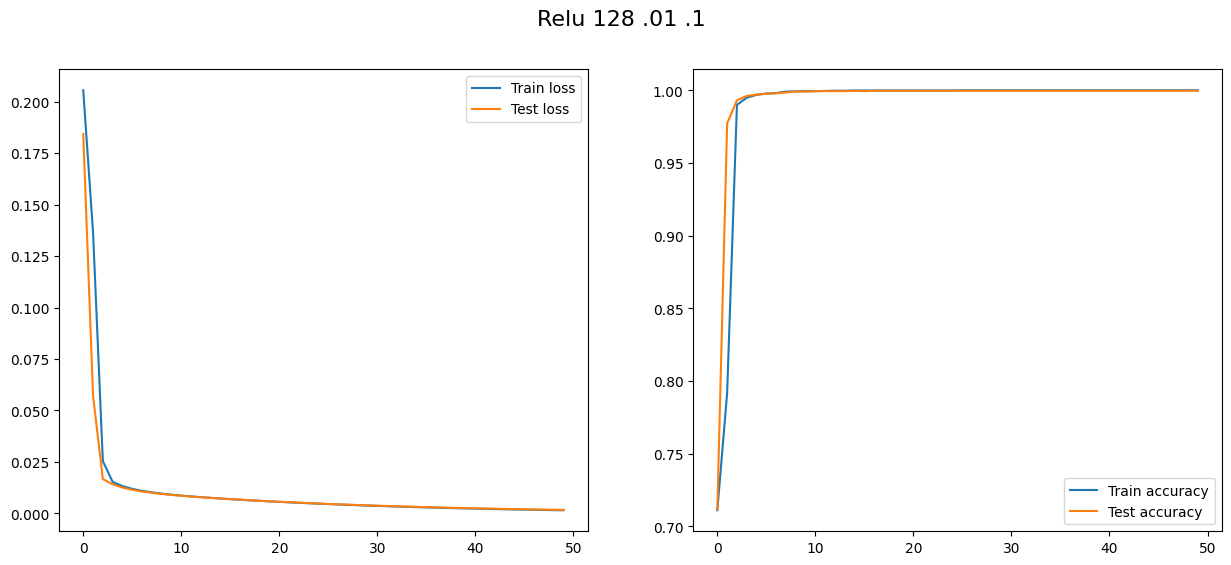

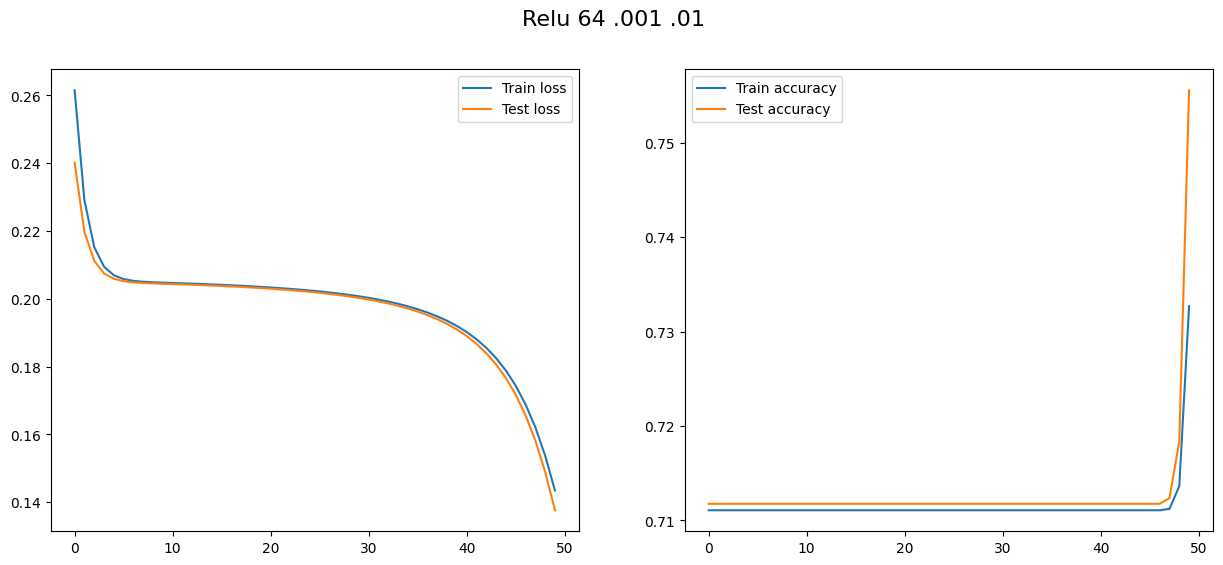

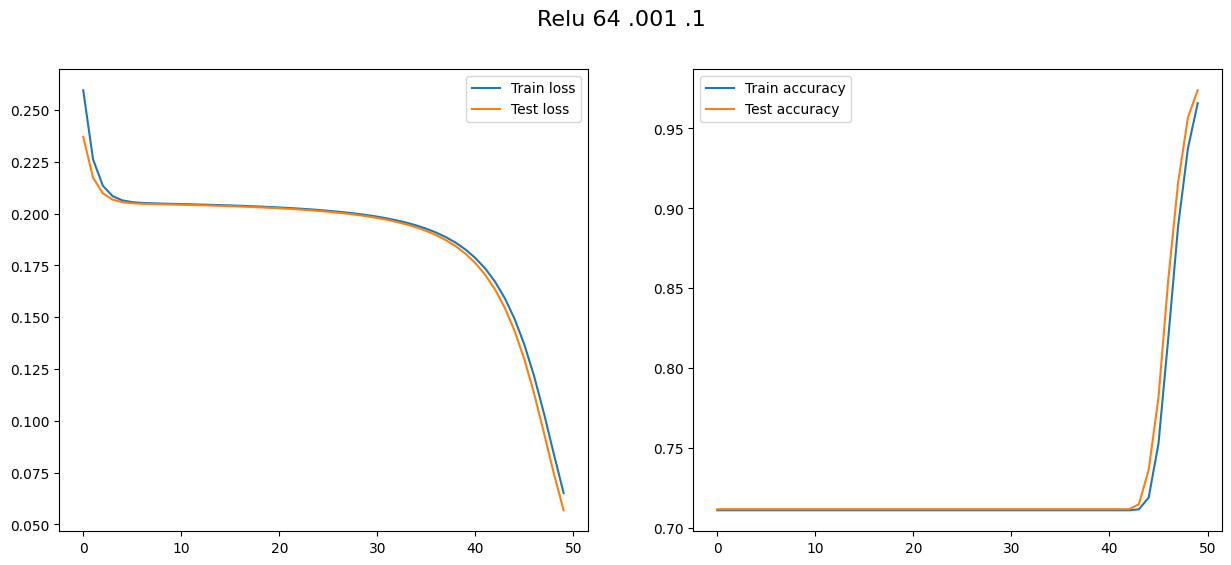

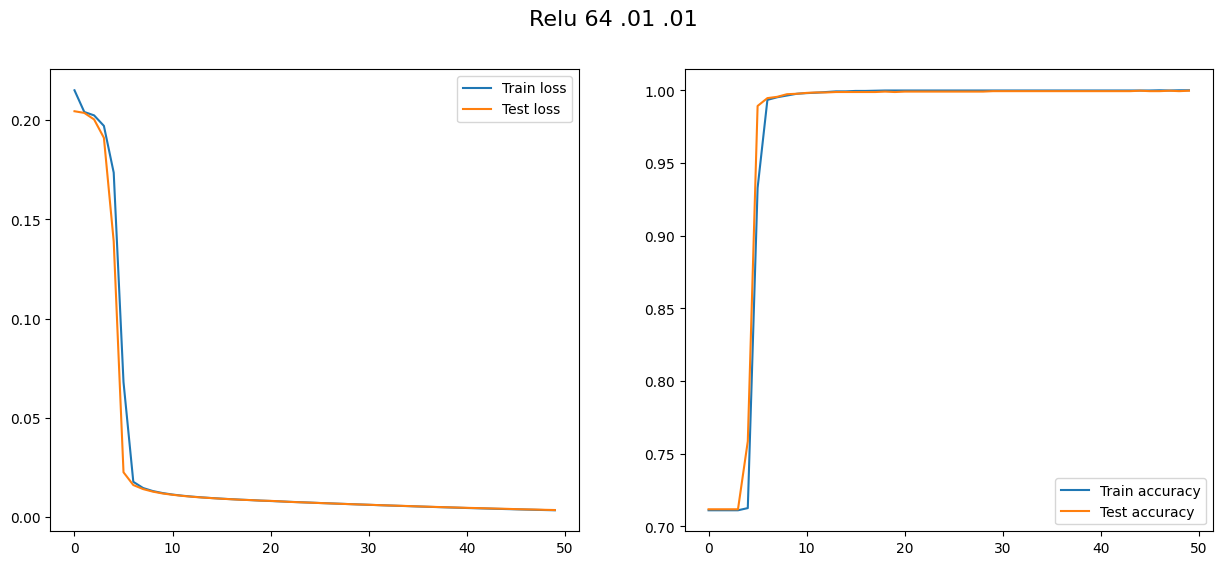

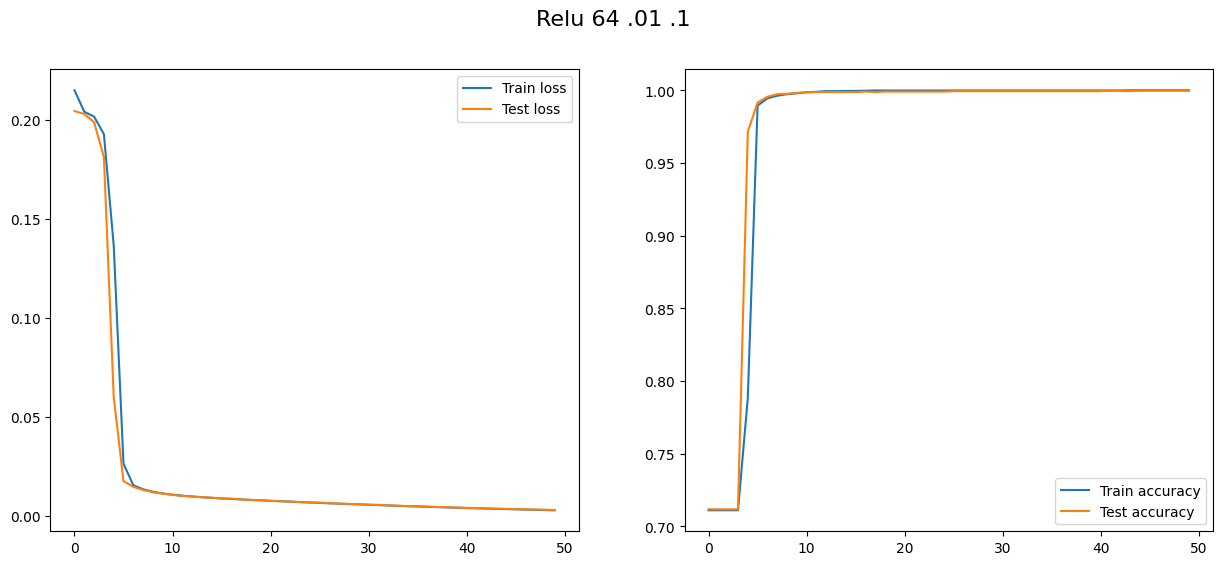

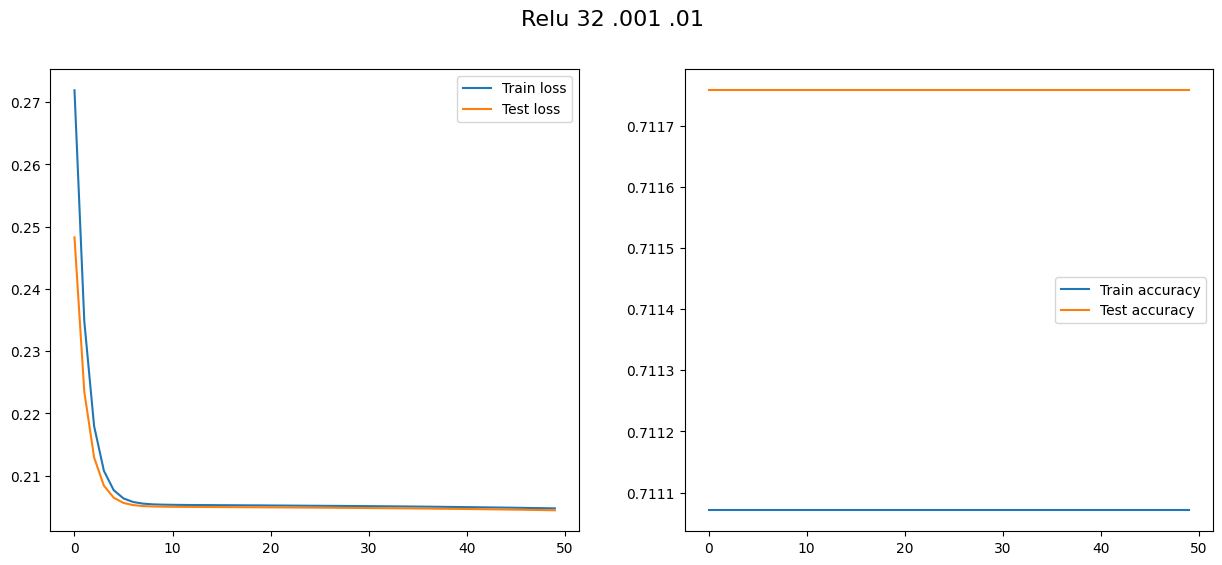

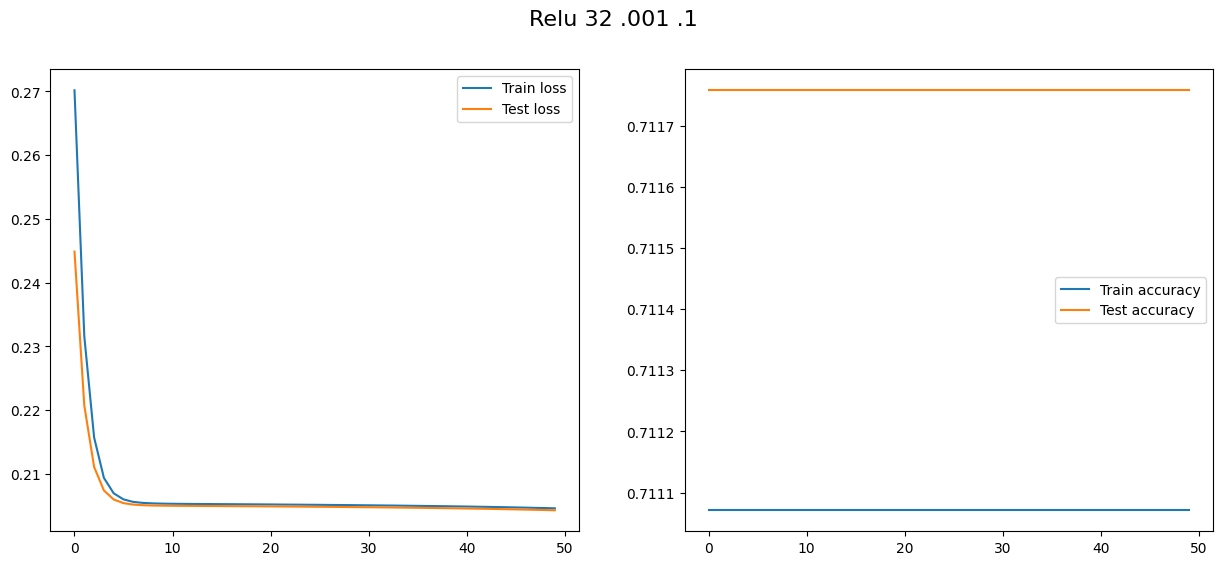

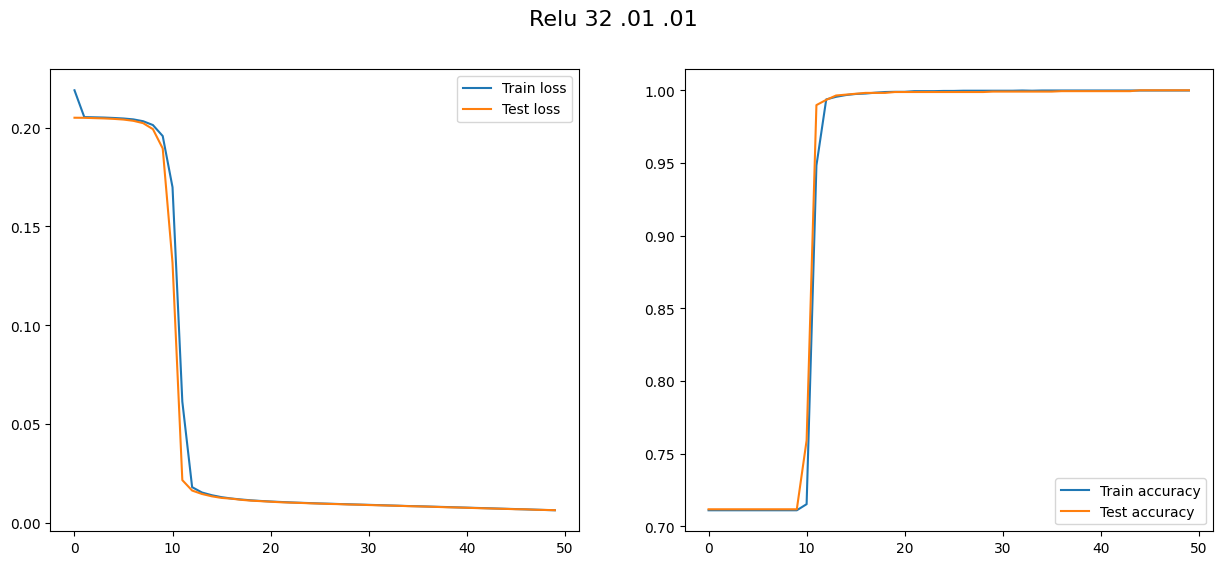

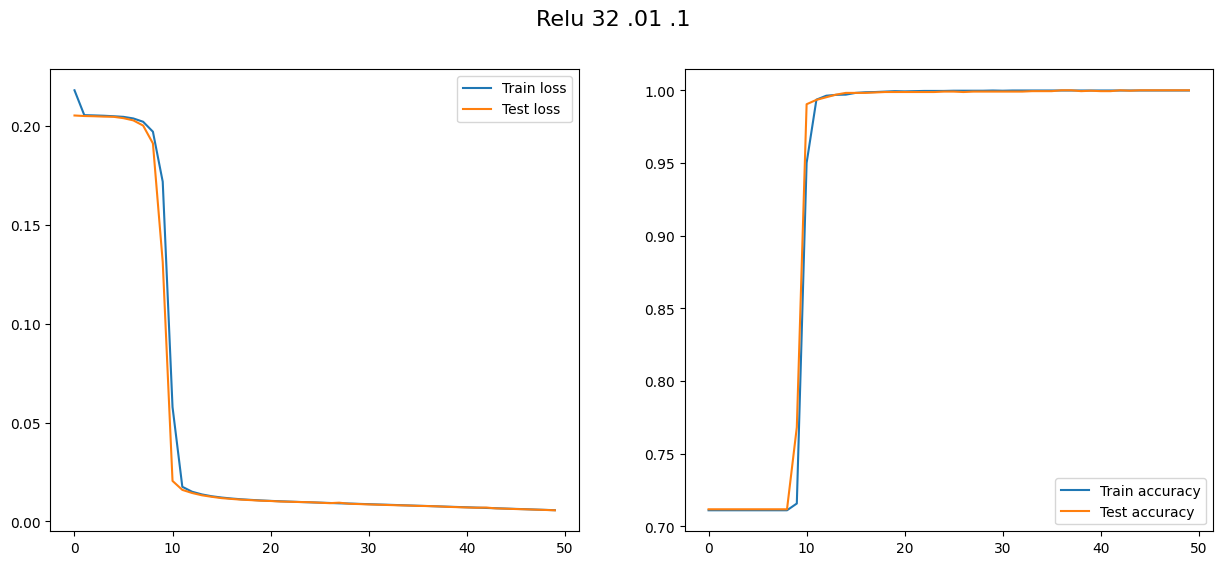

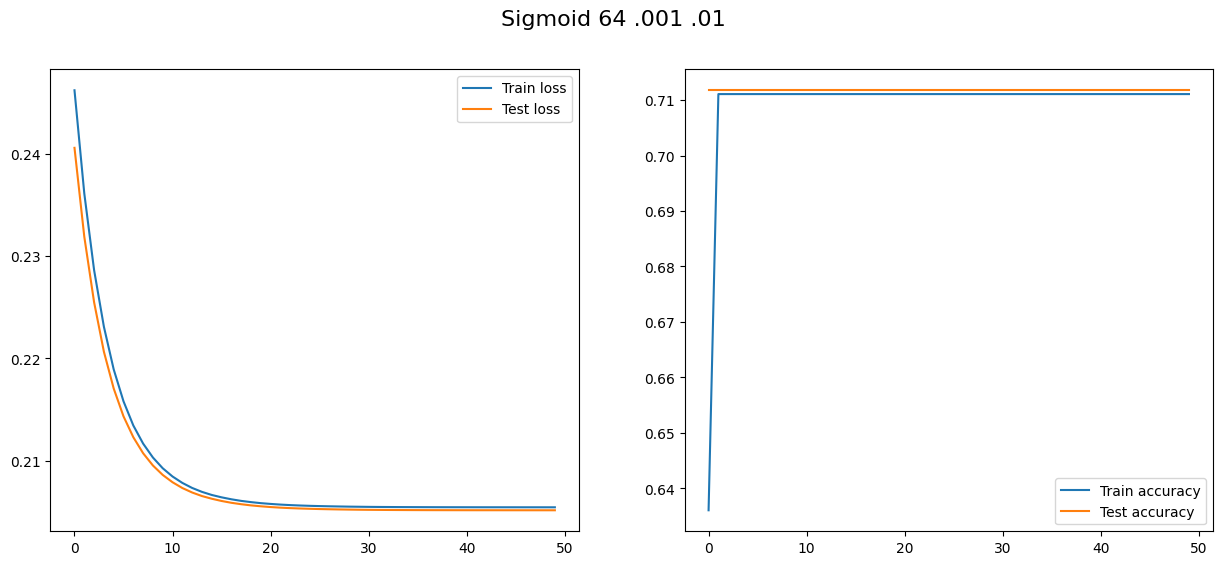

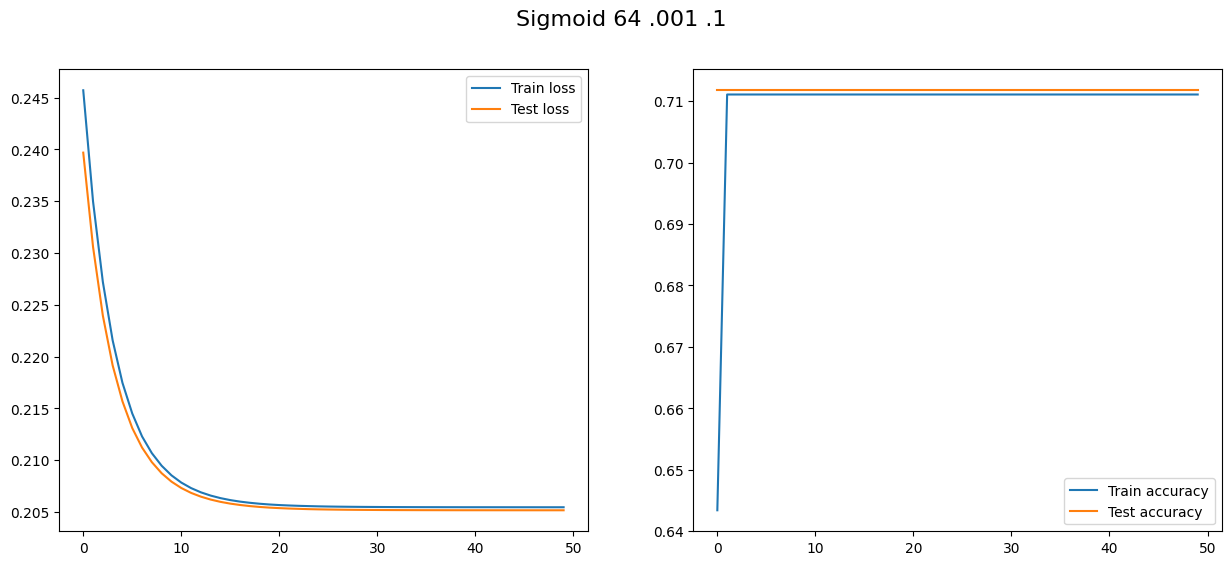

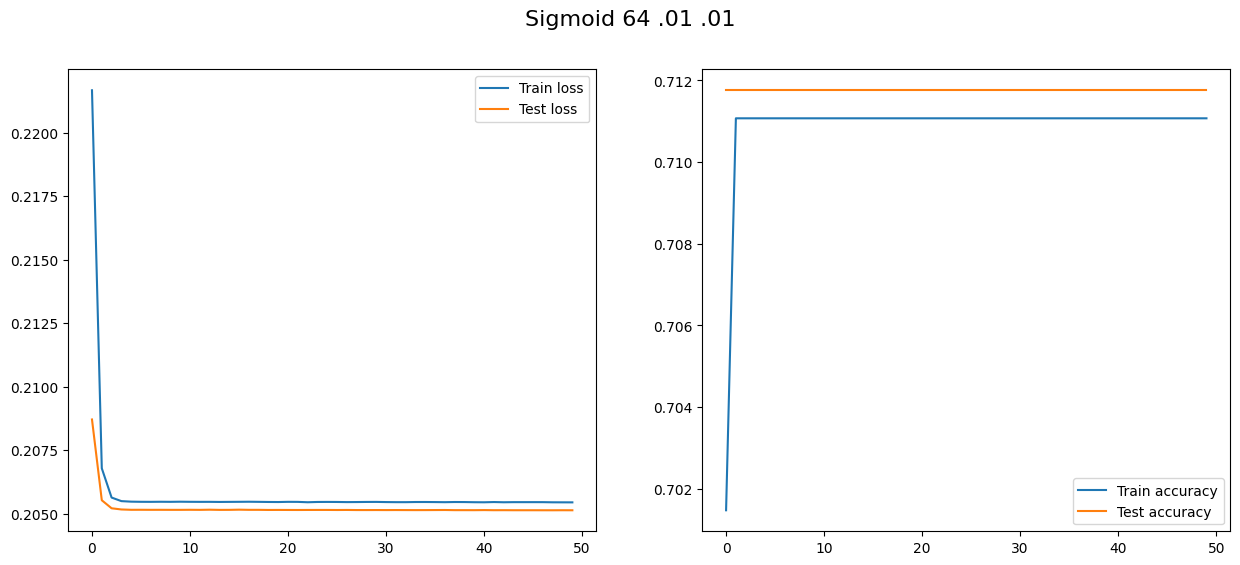

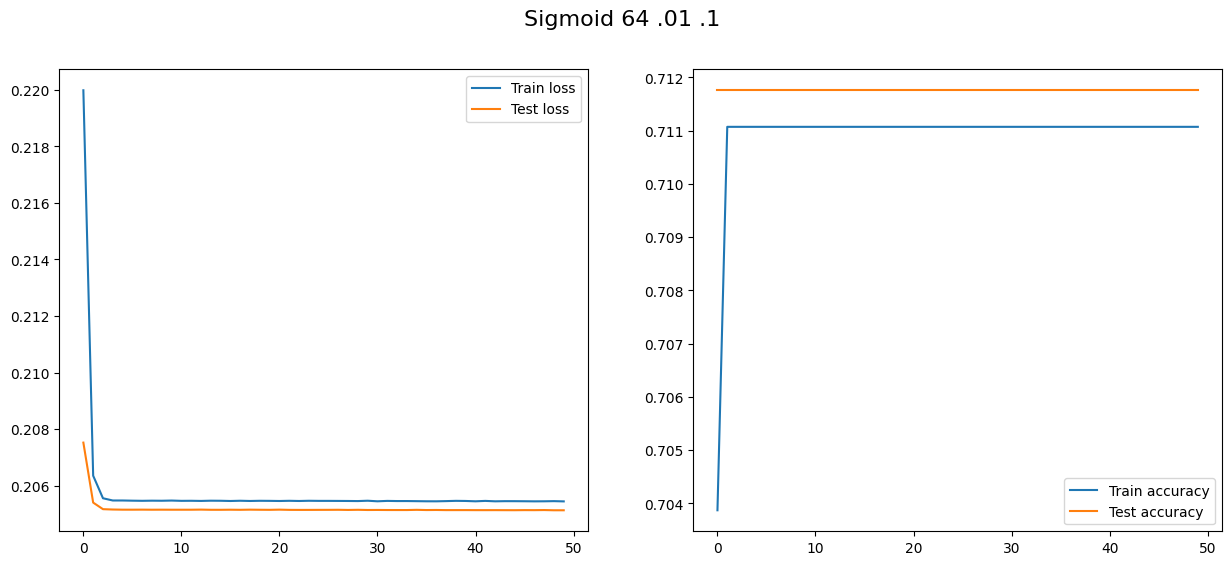

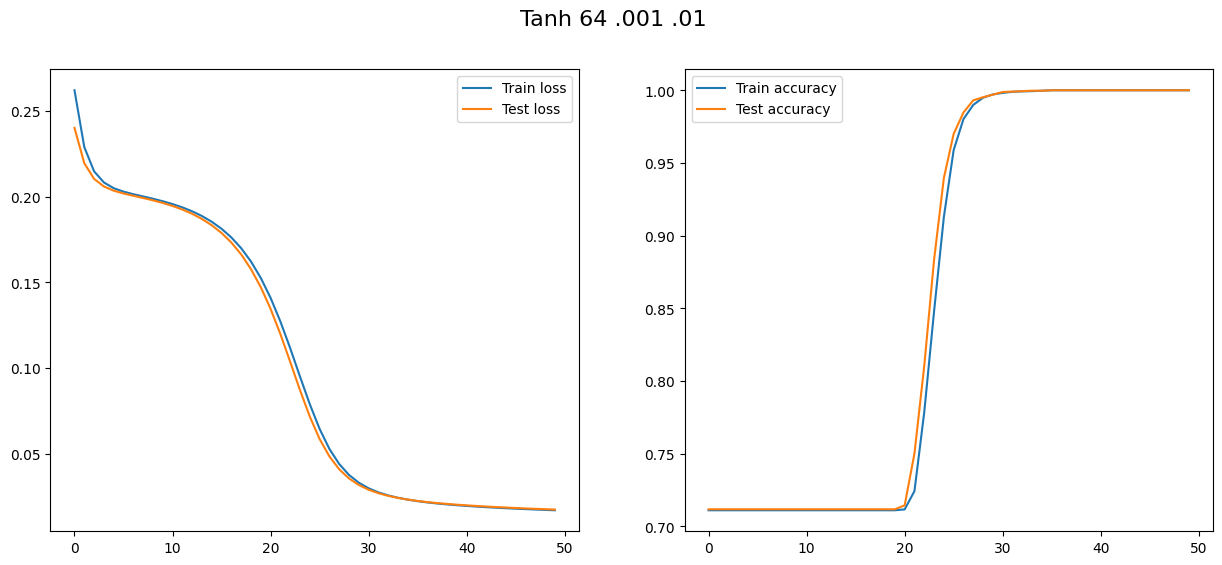

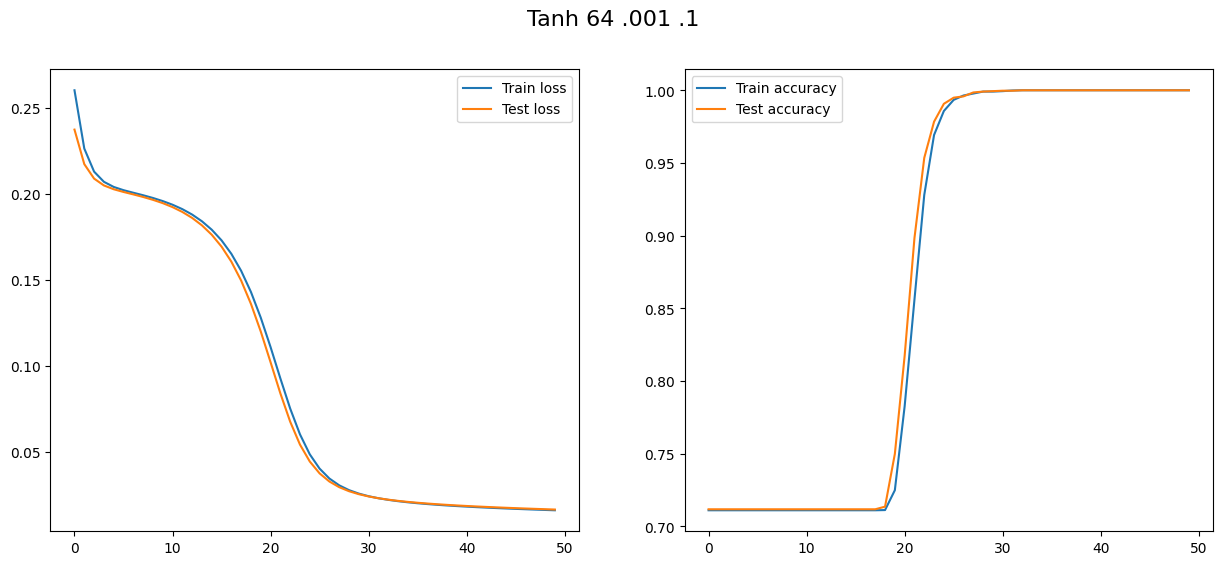

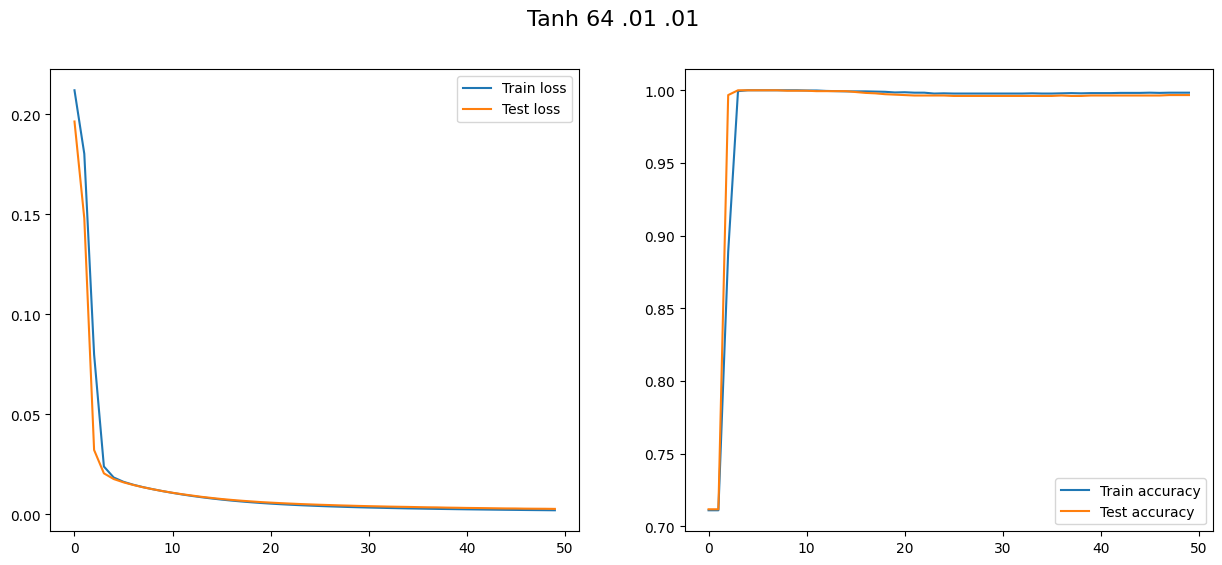

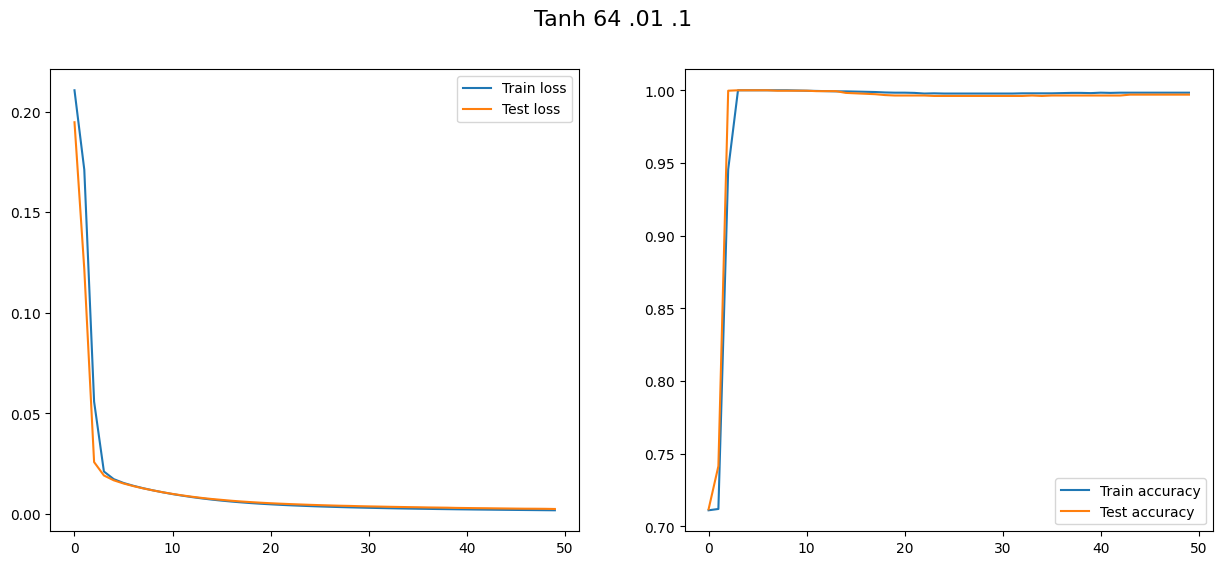

In [ ]:
show(zadanie4)

In [ ]:
!zip -r imgs.zip *.png

  adding: Relu 128 .001 .01.png (deflated 11%)
  adding: Relu 128 .001 .1.png (deflated 11%)
  adding: Relu 128 .01 .01.png (deflated 16%)
  adding: Relu 128 .01 .1.png (deflated 16%)
  adding: Relu 32 .001 .01.png (deflated 20%)
  adding: Relu 32 .001 .1.png (deflated 20%)
  adding: Relu 32 .01 .01.png (deflated 15%)
  adding: Relu 32 .01 .1.png (deflated 15%)
  adding: Relu 64 .001 .01.png (deflated 13%)
  adding: Relu 64 .001 .1.png (deflated 11%)
  adding: Relu 64 .01 .01.png (deflated 15%)
  adding: Relu 64 .01 .1.png (deflated 15%)
  adding: Sigmoid 64 .001 .01.png (deflated 15%)
  adding: Sigmoid 64 .001 .1.png (deflated 16%)
  adding: Sigmoid 64 .01 .01.png (deflated 19%)
  adding: Sigmoid 64 .01 .1.png (deflated 21%)
  adding: Tanh 64 .001 .01.png (deflated 10%)
  adding: Tanh 64 .001 .1.png (deflated 11%)
  adding: Tanh 64 .01 .01.png (deflated 16%)
  adding: Tanh 64 .01 .1.png (deflated 16%)


In [ ]:
df = pd.DataFrame.from_dict([{
    "Ilość neuronów w 1": model.layers[0].output[0].shape[0],
    "Ilość neuronów w 2": model.layers[1].output[0].shape[0],
    "Ilość neuronów w 3": model.layers[2].output[0].shape[0],
    "Funkcja aktywacji w 1": model.layers[0].activation.__name__,
    "Funkcja aktywacji w 2": model.layers[1].activation.__name__,
    "Funkcja aktywacji w 3": model.layers[2].activation.__name__,
    "Współczynnik uczenia": learning_rate,
    "Pęd": momentum,
    "Liczba epok": epochs,
    "Dokładność uczenia": history["binary_accuracy"][-1],
    "Spadek uczenia": history["loss"][-1],
    "Dokładność testowa": history["val_binary_accuracy"][-1],
    "Spadek testowy": history["val_loss"][-1],
} for (history, model, (_, learning_rate, momentum, epochs), title) in zadanie4])
df

,Ilość neuronów w 1,Ilość neuronów w 2,Ilość neuronów w 3,Funkcja aktywacji w 1,Funkcja aktywacji w 2,Funkcja aktywacji w 3,Współczynnik uczenia,Pęd,Liczba epok,Dokładność uczenia,Spadek uczenia,Dokładność testowa,Spadek testowy
0,128,64,32,relu,relu,relu,0.001,0.01,50,0.996850,0.013197,0.996401,0.013227
1,128,64,32,relu,relu,relu,0.001,0.10,50,0.997300,0.012544,0.997001,0.012587
2,128,64,32,relu,relu,relu,0.010,0.01,50,1.000000,0.001858,0.999700,0.002037
3,128,64,32,relu,relu,relu,0.010,0.10,50,1.000000,0.001504,0.999700,0.001694
4,64,32,16,relu,relu,relu,0.001,0.01,50,0.732673,0.143438,0.755549,0.137633
5,64,32,16,relu,relu,relu,0.001,0.10,50,0.965797,0.065073,0.973905,0.056771
6,64,32,16,relu,relu,relu,0.010,0.01,50,1.000000,0.003426,0.999700,0.003553
7,64,32,16,relu,relu,relu,0.010,0.10,50,1.000000,0.002924,0.999700,0.003056
8,32,16,8,relu,relu,relu,0.001,0.01,50,0.711071,0.204741,0.711758,0.204436
9,32,16,8,relu,relu,relu,0.001,0.10,50,0.711071,0.204583,0.711758,0.204278
